# Equations différentielles

Modèle proie prédateur (Lotka Volterra) :
$$ \begin{matrix} \dot x_1 & = & x_1 ( \alpha - \beta x_2 ) \\ \dot x_2 & = & - x_2 ( \gamma - \delta x_2 )  \end{matrix}$$

On définit  :
$$
\begin{array}{ccccc}
f & : & \mathbb{R}^2 & \to & \mathbb{R}^2 \\
  & & (x_1,x_2) & \mapsto & \begin{pmatrix} x_1(\alpha - \beta x_2)\\ x_2(\gamma - \delta x_1) \end{pmatrix}
\end{array}
$$

En notant $X=\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}$ on a $ f (X)= \dot X $


In [47]:
# On initialise les blocs python : 
import matplotlib.pyplot as plt
import numpy as np

In [49]:
#On définit les paramètres du système
alpha = 2e-1
beta = 1e-1
gamma = 2e-1
delta = 1e-1

In [51]:
def f(t, x, y): #equation de Lotka-Volterra, on separe x et y pour simplifier le code, on a (x,y)=X
    return np.array([x*(alpha - beta*y), -y*(gamma - delta*x)])

# Question 1:
## Signification physique des paramètres:
$\alpha$ est le taux de reproduction des proies : plus il y en a, plus elles se reproduisent.  
$\beta$ est le taux de prédation : plus il est grand, plus les proies diminuent.  
$\gamma$ est le taux de mortalité des prédateurs : il traduit la mortalité naturelle des prédateurs
$\delta$ est le nombre de proies disponibles par prédateur : plus il est grand, plus les prédateurs se reproduisent lorqu'ils mangent. 

## Points d'équilibre:
Pour trouver les points d'équilibre du système, on résout:
$$
\left\{
    \begin{array}{ll}
        x_1(\alpha - \beta x_2) = 0 \\
        x_2(\gamma - \delta x_1) = 0 
    \end{array}
\right.
$$
ce qui donne comme solution en particulier le point $(0, 0)$ et l'unique point sur $\mathbb{R_+^*}^2$ : $\bar{x} = $ $(\frac{\gamma}{\delta}, \frac{\alpha}{\beta})$

# Question 2

## Champ de vecteurs

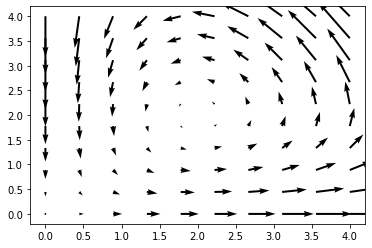

In [53]:
x=np.linspace(0,4,10)
y=np.linspace(0,4,10)
Xval,Yval=np.meshgrid(x,y)
plt.figure()
Xp=f(0,Xval,Yval)
plt.quiver(Xval,Yval,Xp[0,:,:],Xp[1,:,:])
plt.show()

Les solutions vont tourner autour du du point d'équilibre $\overline x$.

## Portrait de phase

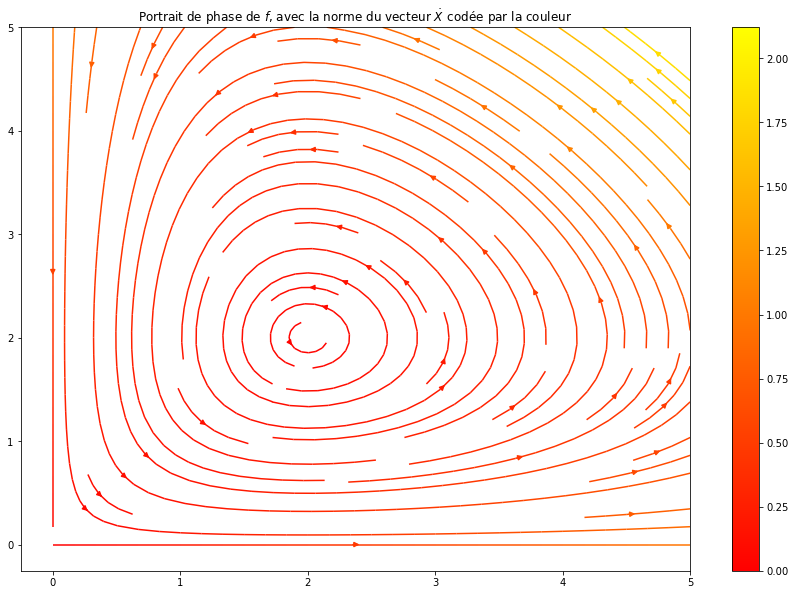

In [55]:
fig = plt.figure(figsize= (15, 10))
Y, X = np.mgrid[0:5:1000j, 0:5:1000j]
U, V = f(0, X, Y)
fig.colorbar(plt.streamplot(X, Y, U, V, color=np.sqrt(U**2+V**2), cmap="autumn").lines)
plt.title(r"Portrait de phase de $f$, avec la norme du vecteur $ \dot X $ codée par la couleur")
plt.show()

# Question 3

Les composantes de $f$ sont polynomiales donc elle est continue et continuement différentiable (par rapport à x).  
Par le théorème de Cauchy-Lipschitz, le solution maximale d'un problème de Cauchy sur l'équation de Lokta-Volterra est unique.  

Soit $x_0 = (x_{10}, x_{20}) \in \mathbb{R_+^*}^2$ et $x$ une solution de l'équation de Lokta-Volterratelle que $x(t_0) = x_0$.
Supposons qu'il existe $t_1$ tel que $x(t_1)_1 = 0$ et $x(t_1)_2 > 0$.  
La fonction $y(t) = (0, y_2(t))$ où $ \dot y_2 = \gamma y_2  $ et $y(t_1)_2 =  x(t_1)_2$ est solution du problème de Cauchy : 
$$
\left\{
    \begin{array}{ll}
        \dot x_1 = x_1(\alpha - \beta x_2) \\
        \dot x_2 = x_2(\gamma - \delta x_1) \\
        x(t_1) = (0, x(t_1)_2)
    \end{array}
\right.
$$
$x$ est aussi solution du même de problème de Cauchy donc par unicité des solutions maximales : $ x = y $ d'où $x_1 = 0$, ce qui est absurde car $x_{10} \neq 0$.  
D'où les solutions de Lokta-Volterra ne peuvent pas couper l'axe des abscisses et de manière symétrique (en appliquant le même raisonnement) l'axe des ordonnées. Ainsi $x$ reste dans le plan $\mathbb{R_+^*}^2$.

# Question 4

In [57]:
def H(x, y):
    return delta*x - gamma*np.log(x) + beta*y - alpha*np.log(y)

Calculons la dérivée de H pour $x = (x_1, x_2)$ une solution de l'équation de Lokta-Volterra initialisée dans $\mathbb{R_+^*}^2$ définie sur un intervalle $I$ de $\mathbb{R}$.  
On a pour tout $t$ $\in$ $I$:
$$
\frac{dH(t)}{dt} = \delta \dot x_1 - \gamma \frac{\dot x_1}{x_1} + \beta \dot x_2 - \alpha \frac{\dot x_2}{x_2}
$$

ce qui donne en remplaçant $\dot x$ et $\dot y$ par leurs expressions dans l'équation de Lokta-Volterra, 
$$
\frac{dH(t)}{dt} = -\delta x_1(\alpha - \beta x_2) + \gamma (\alpha - \beta x_2) + \beta x_2(\gamma - \delta x_1) - \alpha (\gamma - \delta x_1)
$$
d'où:
$$
\frac{dH(t)}{dt} = 0
$$
H est donc constant sur les solutions de l'équation de Lokta-Volterra.

Notons $x$ une solution de Lokta-Volterra définie sur $\mathbb{R_+^*}^2$.  
Par le théorème du domaine maximale d'existence, soit $x$ diverge en temps fini, soit $x$ est définie sur $\mathbb{R}$. Or si $x$ diverge alors l'un de ses composantes diverge aussi et H aussi, ce qui est impossible car H est constant dans le temps. 


# Question 5

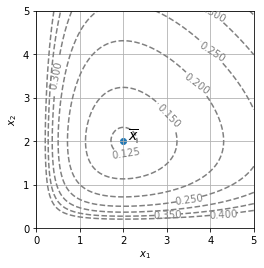

In [58]:
xmax=5
ymax=5

x=np.linspace(0,xmax,100)
y=np.linspace(0,ymax,100)
levels=[0.125,0.15,0.2,0.25,0.3,0.35,0.4]

X, Y = np.meshgrid(x, y)
Z = H(X, Y)
fig, ax = plt.subplots()
contour_set = plt.contour(
    X, Y, Z, colors="grey", linestyles="dashed", 
    levels=levels
)
ax.clabel(contour_set)
plt.grid(True)
plt.xlim([0,xmax])
plt.ylim([0,ymax])
plt.xlabel("$x_1$") 
plt.ylabel("$x_2$")
plt.gca().set_aspect("equal")
plt.scatter(gamma/delta, alpha/beta)
plt.text(1.05*gamma/delta, alpha/beta,r"$\overline {x}$",size=14)
plt.show()

La question 4 donne qu'une solution suit une courbe de niveau de $H$.

Si on part d'une condition intitiale proche de $ \overline x$, on reste arbitrairement proche de $\overline x$ car les solutions tournent autour du point d'équilibre (ou du moins on est sur un domaine dont la distance à $ \overline x$ est bornée), donc $\overline x$ est stable au sens de la définition de stabilité : $$ \forall \epsilon >0, \exists \eta \ | \ \forall x_0 \ | \ \|\bar x - x_0 \| < \eta , \forall t \in \mathbb R , \|\bar x - x(t) \| < \epsilon $$
En prenant aussi en compte le champ de vecteurs (question 2) on voit que les solutions "tournent" autour de $ \overline x$ dans le sens anti-horaire, elles seront donc periodiques.

# Question 6

In [59]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t = np.linspace(t0, tf, int((tf-t0)/dt))
    x = np.zeros(shape=(len(x0), len(t)))
    x[:, 0] = x0
    
    for i in range(len(t)-1):
        x[:, i+1] = x[:, i] + dt * f(t, *x[:, i])
    return t, x

## Test sur des solutions connus

On commence par tester euler explicite sur l'équation différentielle $\dot x = x$ dont la solution est la fonction exponentielle.

In [62]:
def fexp(t,x):
    return x

t,x=solve_euler_explicit(fexp,[1],1,0,5)
plt.plot(t,x)
t,x=solve_euler_explicit(fexp,[1],0.1,0,5)
plt.plot(t,x)
t,x=solve_euler_explicit(fexp,[1],0.01,0,5)
plt.plot(t,x)
t,x=solve_euler_explicit(fexp,[1],0.001,0,5)
plt.plot(t,x)
plt.plot(t,np.exp(np.array(t)),'g--')
plt.legend(["dt=1","dt=0.1","dt=0.01","dt=0.001","real(dt=0)"])

plt.show()

ValueError: x and y must have same first dimension, but have shapes (5,) and (1, 5)